# STOCK ANALYSIS 

In [1]:
from nsepy import get_history
from bokeh.plotting import figure
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

In [2]:
infy=get_history(symbol='INFY',start=date(2015,1,1),end=date(2016,1,1))
tcs=get_history(symbol='TCS',start=date(2015,1,1),end=date(2016,1,1))
index=get_history(symbol='NIFTYIT',start=date(2015,1,1),end=date(2016,1,1),index=True)

In [3]:
#Parsing date 
tcs=tcs.reset_index()
tcs['Date']=pd.to_datetime(tcs['Date'])

index=index.reset_index()
index['Date']=pd.to_datetime(index['Date'])
 
infy=infy.reset_index()
infy['Date']=pd.to_datetime(infy['Date'])


# Data preview

In [4]:
infy.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [5]:
tcs.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
3,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
4,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724


In [6]:
index.head()

,Date,Open,High,Low,Close,Volume,Turnover
0,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09
1,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09
2,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10
3,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10
4,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10


# Day, weekYear and Month extraction

In [7]:
stocks=[infy,index,tcs]
infy.name='INFY'
index.name='NIFTYIT'
tcs.name='TCS'

In [8]:
#converting year into weekyear, day and months
def week_day_extraction(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.weekofyear
    
for i in range(len(stocks)):
    # print(stocks[i])
    week_day_extraction(stocks[i])

In [9]:
index.head()

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear
0,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015,1,1,1
1,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1
2,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015,1,5,2
3,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,2015,1,6,2
4,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,2015,1,7,2


In [10]:
#Indexing the stocks with time
def DateIndex(stocks):
    for i in range(len(stocks)):
        stocks[i].index=stocks[i].Date
DateIndex(stocks)

In [11]:
index.head()

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015,1,1,1
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015,1,5,2
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,2015,1,6,2
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,2015,1,7,2


# Part 1

# 1.1 moving average calculation for period of 4,16,28,40,52 weeks


In [12]:
weeks=[4,16,28,40,52]
def getMovingAvg(stocks,weeks):
    dummy = pd.DataFrame()#creating dummy dataframe for storing closing price on basis of different week frequency
    dummy['Close'] = stocks['Close'].resample('W').mean() 
     
    for i in range(len(weeks)):
        m_a = dummy['Close'].rolling(weeks[i]).mean()
        dummy["MA_"+str(weeks[i])+"WEEK"] = m_a
    return dummy

In [13]:
MA=[]
for i in range(len(stocks)):
    df=getMovingAvg(stocks[i],weeks)
    MA.append(df)

In [14]:
print("Moving average for different periods for stock",stocks[0].name)
MA[0].head()


Moving average for different periods for stock INFY


,Close,MA_4WEEK,MA_16WEEK,MA_28WEEK,MA_40WEEK,MA_52WEEK
Date,,,,,,
2015-01-04,1993.8000,NaN,NaN,NaN,NaN,NaN
2015-01-11,1992.3100,NaN,NaN,NaN,NaN,NaN
2015-01-18,2117.2100,NaN,NaN,NaN,NaN,NaN
2015-01-25,2161.6200,2066.235000,NaN,NaN,NaN,NaN
2015-02-01,2142.1125,2103.313125,NaN,NaN,NaN,NaN


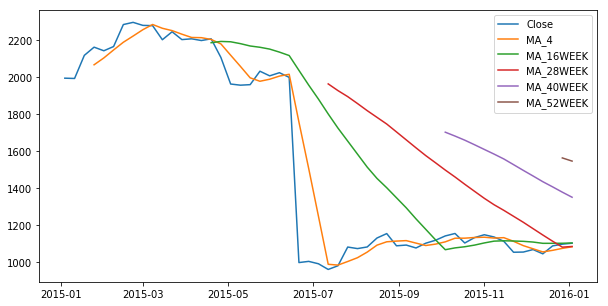

In [15]:
plt.figure(figsize=(10,5))
plt.plot(MA[0].Close)
plt.plot(MA[0]['MA_4WEEK'],label="MA_4")
plt.plot(MA[0]['MA_16WEEK'])
plt.plot(MA[0]['MA_28WEEK'])
plt.plot(MA[0]['MA_40WEEK'])
plt.plot(MA[0]['MA_52WEEK'])
plt.legend()

In [16]:
print("Moving average for different periods for stock",stocks[1].name)
MA[1].head()

Moving average for different periods for stock NIFTYIT


,Close,MA_4WEEK,MA_16WEEK,MA_28WEEK,MA_40WEEK,MA_52WEEK
Date,,,,,,
2015-01-04,11293.900,NaN,NaN,NaN,NaN,NaN
2015-01-11,11108.450,NaN,NaN,NaN,NaN,NaN
2015-01-18,11598.040,NaN,NaN,NaN,NaN,NaN
2015-01-25,11777.490,11444.47000,NaN,NaN,NaN,NaN
2015-02-01,11787.975,11567.98875,NaN,NaN,NaN,NaN


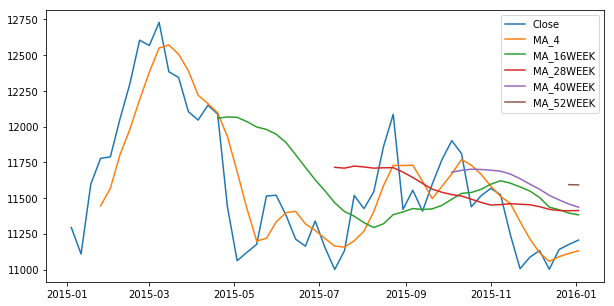

In [17]:
plt.figure(figsize=(10,5))
plt.plot(MA[1].Close)
plt.plot(MA[1]['MA_4WEEK'],label="MA_4")
plt.plot(MA[1]['MA_16WEEK'])
plt.plot(MA[1]['MA_28WEEK'])
plt.plot(MA[1]['MA_40WEEK'])
plt.plot(MA[1]['MA_52WEEK'])
plt.legend()

In [18]:
print("Moving average for different periods for stock",stocks[2].name)
MA[2].head()

Moving average for different periods for stock TCS


,Close,MA_4WEEK,MA_16WEEK,MA_28WEEK,MA_40WEEK,MA_52WEEK
Date,,,,,,
2015-01-04,2562.5000,NaN,NaN,NaN,NaN,NaN
2015-01-11,2472.1300,NaN,NaN,NaN,NaN,NaN
2015-01-18,2520.1600,NaN,NaN,NaN,NaN,NaN
2015-01-25,2508.4800,2515.817500,NaN,NaN,NaN,NaN
2015-02-01,2517.0875,2504.464375,NaN,NaN,NaN,NaN


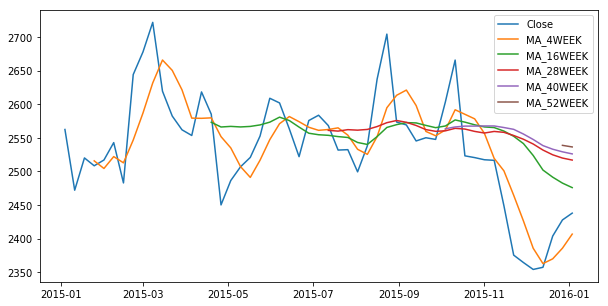

In [19]:
plt.figure(figsize=(10,5))
plt.plot(MA[2].Close)
plt.plot(MA[2]['MA_4WEEK'])
plt.plot(MA[2]['MA_16WEEK'])
plt.plot(MA[2]['MA_28WEEK'])
plt.plot(MA[2]['MA_40WEEK'])
plt.plot(MA[2]['MA_52WEEK'])
plt.legend()

# 1.2 Creating rolling window of 10 to size 75 on daily chart 

In [20]:
window=[10,75]
def get_roll_win(stocks):
    dummy=pd.DataFrame()
    dummy['Close']=stocks['Close']
    for i in range(len(window)):
        dummy['MA'+str(window[i])]=stocks.Close.rolling(window[i]).mean()
    return dummy

In [21]:
roll_win=[]
for i in range(len(stocks)):
    df=get_roll_win(stocks[i])
    roll_win.append(df)

rolling window for stockINFY
              Close  MA10  MA75
Date                           
2015-01-01  1974.40   NaN   NaN
2015-01-02  2013.20   NaN   NaN
2015-01-05  1995.90   NaN   NaN
2015-01-06  1954.20   NaN   NaN
2015-01-07  1963.55   NaN   NaN


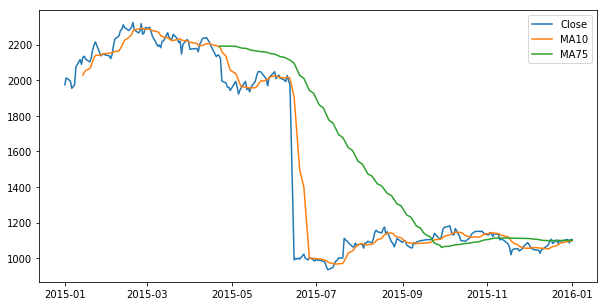

In [23]:
print("rolling window for stock"+stocks[0].name)
plt.figure(figsize=(10,5))
print(roll_win[0].head())
plt.plot(roll_win[0].Close)
plt.plot(roll_win[0].MA10)
plt.plot(roll_win[0].MA75)
plt.legend()

rolling window for stockNIFTYIT
               Close  MA10  MA75
Date                            
2015-01-01  11215.70   NaN   NaN
2015-01-02  11372.10   NaN   NaN
2015-01-05  11248.55   NaN   NaN
2015-01-06  10959.90   NaN   NaN
2015-01-07  10916.00   NaN   NaN


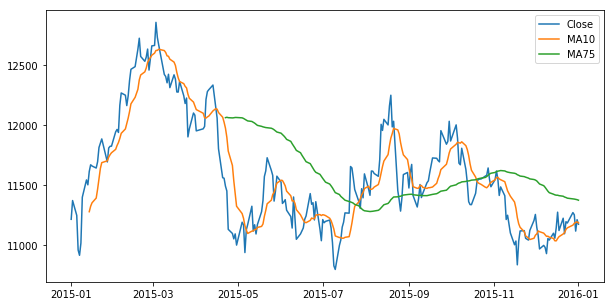

In [24]:
print("rolling window for stock"+stocks[1].name)
plt.figure(figsize=(10,5))
print(roll_win[1].head())
plt.plot(roll_win[1].Close)
plt.plot(roll_win[1].MA10)
plt.plot(roll_win[1].MA75)
plt.legend()

rolling window for stockTCS
              Close  MA10  MA75
Date                           
2015-01-01  2545.55   NaN   NaN
2015-01-02  2579.45   NaN   NaN
2015-01-05  2540.25   NaN   NaN
2015-01-06  2446.60   NaN   NaN
2015-01-07  2417.70   NaN   NaN


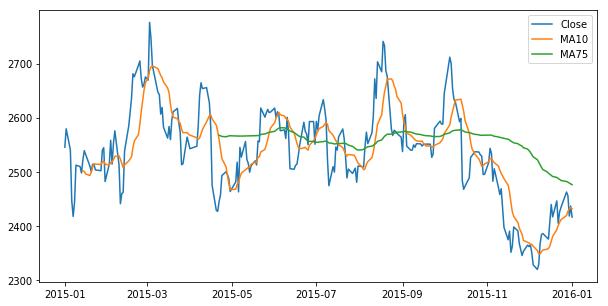

In [25]:
print("rolling window for stock"+stocks[2].name)
plt.figure(figsize=(10,5))
print(roll_win[2].head())
plt.plot(roll_win[2].Close)
plt.plot(roll_win[2].MA10)
plt.plot(roll_win[2].MA75)
plt.legend()

# 1.3 Volume shock and price shock 

# Volume shock & direction

In [26]:
def volume_shocks(stock):
    stock["VOL_T+1"] = stock.Volume.shift(1)  #next rows value
    
    stock["Vol_shock"] = ((abs(stock["VOL_T+1"] - stock["Volume"])/stock["Volume"]*100)  > 10).astype(int)
    
    return stock

In [27]:
for i in range(len(stocks)):
    volume_shocks(stocks[i])

In [28]:
def direction_vol_shock(stock):
    if stock["Vol_shock"] == 0:  #if there is no volume shock then pass 
        pass
    else:
        if (stock["VOL_T+1"] - stock["Volume"]) < 0:     # if there is volume shock then direction is defined here
            return 0
        else:
            return 1

In [29]:
def vol_shock_direction(stock):
    stock['VOL_SHOCK_DIR'] = 'Nan'
    stock['VOL_SHOCK_DIR'] = stock.apply(direction_vol_shock, axis=1)

In [30]:
for i in range(len(stocks)):
    vol_shock_direction(stocks[i])

In [32]:
stocks[0].head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades,Deliverable Volume,%Deliverble,Year,Month,Day,WeekOfYear,VOL_T+1,Vol_shock,VOL_SHOCK_DIR
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,...,14908,258080,0.5154,2015,1,1,1,NaN,0,NaN
2015-01-02,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,...,54166,1249104,0.7371,2015,1,2,1,500691.0,1,0.0
2015-01-05,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,...,82694,1830962,0.7370,2015,1,5,2,1694580.0,1,0.0
2015-01-06,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,...,108209,1772070,0.7332,2015,1,6,2,2484256.0,0,NaN
2015-01-07,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,...,62463,1317720,0.7270,2015,1,7,2,2416829.0,1,1.0


# Price shock & direction (same as pricing black swan)

In [33]:
def price_shocks(stock):
    stock["PRICE_T+1"] = stock.Close.shift(1)  #next rows value
    
    stock["price_shock"] = ((abs(stock["PRICE_T+1"] - stock["Close"])/stock["Close"]*100)  > 2).astype(int)
    
    return stock

In [34]:
for i in range(len(stocks)):
    price_shocks(stocks[i])

In [35]:
def direction_price_shock(stock):
    if stock["price_shock"] == 0:  #if there is no volume shock then pass 
        pass
    else:
        if (stock["PRICE_T+1"] - stock["Close"]) < 0:     # if there is volume shock then direction is defined here
            return 0
        else:
            return 1

In [36]:
def price_shock_direction(stock):
    stock['PRICE_SHOCK_DIR'] = 'Nan'
    stock['PRICE_SHOCK_DIR'] = stock.apply(direction_price_shock, axis=1)

In [37]:
for i in range(len(stocks)):
    price_shock_direction(stocks[i])

In [38]:
stocks[0].head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Year,Month,Day,WeekOfYear,VOL_T+1,Vol_shock,VOL_SHOCK_DIR,PRICE_T+1,price_shock,PRICE_SHOCK_DIR
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,...,2015,1,1,1,NaN,0,NaN,NaN,0,NaN
2015-01-02,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,...,2015,1,2,1,500691.0,1,0.0,1974.4,0,NaN
2015-01-05,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,...,2015,1,5,2,1694580.0,1,0.0,2013.2,0,NaN
2015-01-06,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,...,2015,1,6,2,2484256.0,0,NaN,1995.9,1,1.0
2015-01-07,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,...,2015,1,7,2,2416829.0,1,1.0,1954.2,0,NaN


# Pricing shock without volume shock 

In [39]:
def price_shock_wo_vol_shock(stock):
    
    stock["not_vol_shock"]  = (~(stock["Vol_shock"].astype(bool))).astype(int)
    stock["price_shock_w/0_vol_shock"] = stock["not_vol_shock"] & stock["price_shock"]
    
    return stock

In [40]:
for i in range(len(stocks)):
    price_shock_wo_vol_shock(stocks[i])

In [41]:
stocks[0].head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Day,WeekOfYear,VOL_T+1,Vol_shock,VOL_SHOCK_DIR,PRICE_T+1,price_shock,PRICE_SHOCK_DIR,not_vol_shock,price_shock_w/0_vol_shock
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,...,1,1,NaN,0,NaN,NaN,0,NaN,1,0
2015-01-02,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,...,2,1,500691.0,1,0.0,1974.4,0,NaN,0,0
2015-01-05,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,...,5,2,1694580.0,1,0.0,2013.2,0,NaN,0,0
2015-01-06,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,...,6,2,2484256.0,0,NaN,1995.9,1,1.0,1,1
2015-01-07,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,...,7,2,2416829.0,1,1.0,1954.2,0,NaN,0,0


# Part 2 : Data visualization

In [42]:
from bokeh.plotting import show,output_file,figure

# plotting closing price and price shock without volume shock

In [43]:
def bokeh_plot(stock):
    p=figure(title='Closing price plot and mark of price shock without volume shock',plot_width=1000,plot_height=400,x_axis_type='datetime')
    p.line(stock.index,stock.Close,legend=stock.name,color='blue', alpha=0.5)
    p.circle(stock.index, stock.Close*stock["price_shock_w/0_vol_shock"], size=4,color='red',legend='price shock without vol shock')
    output_file('plot.html')
    show(p)

In [44]:
bokeh_plot(stocks[0])

In [45]:
bokeh_plot(stocks[1])

In [46]:
bokeh_plot(stocks[2])

# plotting partial auto-correlation

In [74]:
from matplotlib import pyplot
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from bokeh.plotting import show,output_file,figure
#partial_autocorr=pacf(x=stocks[0].Close,nlags=50)
#plt.plot(partial_autocorr)
#plt.grid()

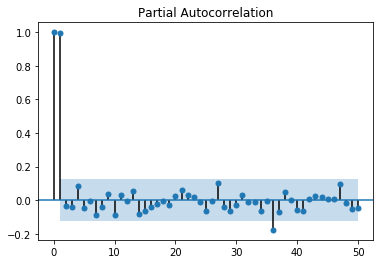

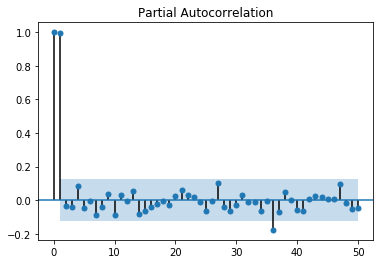

In [68]:
plot_pacf(x=stocks[0].Close,lags=50)

In [83]:
#plotting partial autocorrelation using bokeh plotting and pacf function from statsmodels
def plot_pacf(stocks):
    p=figure(title="Partial autocorrelation of {} closing price vs time lag".format(stocks.name),plot_width=1000,plot_height=400)
    partial_autocorr=pacf(x=stocks.Close,nlags=50)
    p.vbar(x=np.arange(50),top=partial_autocorr,width=0.9)
    show(p)
    output_file("pacf.html")

In [84]:
plot_pacf(stocks[0])

In [85]:
plot_pacf(stocks[1])

In [86]:
plot_pacf(stocks[2])